# Genere Analysis Looking into
- differentiators between songs in different genres
- popular vs not popular in genre

In [35]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [36]:
# Load in the merged data
streaming_df = pd.read_csv('/Users/joseflemker/Documents/GitHub/3250-data-analytics-template/data/finished/merged_data_finished.csv', encoding='utf-8')

Because there are so many genres we need to generalize them into groups
Rock, Metal, Indie/Alternative, Hip Hop/Rap, Pop, R&B

One thing to note is that some songs belong to more than one group so it is sorted in a way that songs get assigned by the first match in the iteration. I have ordered them in a way that makes sense to me corresponnding with research on most popular genres. This is just something to note with the analysis.

In [37]:
# Define new genre groups
genre_mapping = {
    'Pop': ['pop'],
    'Hip Hop/Rap': ['hip hop', 'rap'],
    'Rock': ['rock'],
    'Indie/Alternative': ['indie', 'alternative', 'alt'],
    'R&B': ['r&b'],
    'Folk': ['folk'],
    'Reggae': ['reggae'],
    'Dance': ['dance', 'edm', 'electro', 'house'],
    'Instrumental': ['lo-fi', 'instrumental', 'ambient'],
}

In [38]:
# Now actually iterate through and add the new column
def map_genre(genre):
    for group, keywords in genre_mapping.items():
        if any(keyword in genre.lower() for keyword in keywords):
            return group
    return 'Other'  

# Apply the mapping function to create a new column
streaming_df['genre_group'] = streaming_df['genre'].apply(map_genre)

In [39]:
# Drop rows where genre_group is 'Other'
streaming_df = streaming_df[streaming_df['genre_group'] != 'Other']

In [40]:
# Explore average total and daily streams on a per genre basis
# Gather top 5 genres with the most songs in dfand calculate average total streams
top_track_genres = streaming_df.groupby('genre_group').agg(
        total_streams_avg = ('total_streams', 'mean'),
        daily_streams_avg = ('daily_streams', 'mean'),
        danceability_avg=('danceability', 'mean'),
        energy_avg=('energy', 'mean'),
        liveness_avg=('liveness', 'mean'),
        valence_avg=('valence', 'mean'),
        speechiness_avg=('speechiness', 'mean'),
        acousticness_avg=('acousticness', 'mean'),
        instrumentalness_avg=('instrumentalness', 'mean'),
        loudness_avg=('loudness', 'mean'),
        mode_avg=('mode', 'mean'),
        tempo_avg=('tempo', 'mean'),
        duration_ms_avg=('duration_ms', 'mean'),
        song_count=('track_name', 'count')
    ).reset_index()

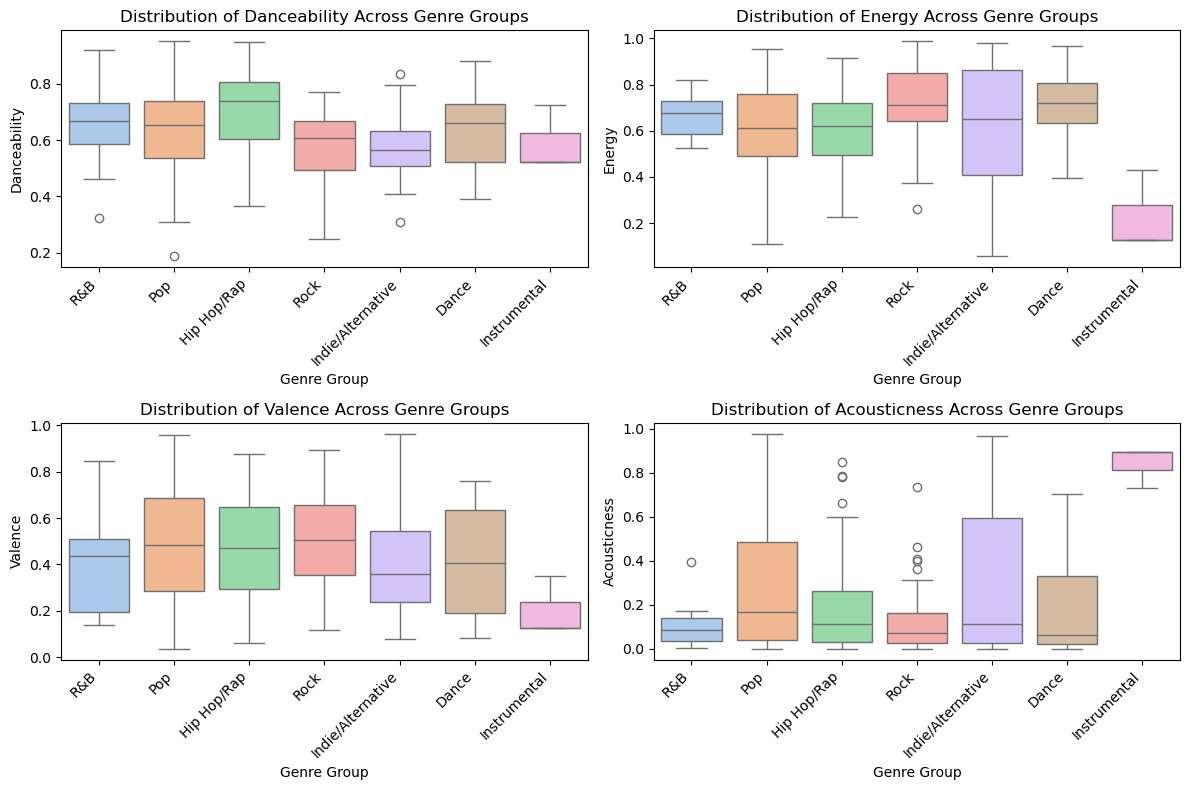

In [41]:
# Plot characteristics across 4 different box plots
features = ['danceability', 'energy', 'valence', 'acousticness']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(data=streaming_df, x='genre_group', y=feature, ax=ax, hue='genre_group', palette='pastel')
    ax.set_title(f'Distribution of {feature.title()} Across Genre Groups')
    ax.set_xlabel('Genre Group')
    ax.set_ylabel(feature.title())
    
    # Generate ticks and rotate them so they can be read
    ticks = ax.get_xticks()
    ax.set_xticks(ticks)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



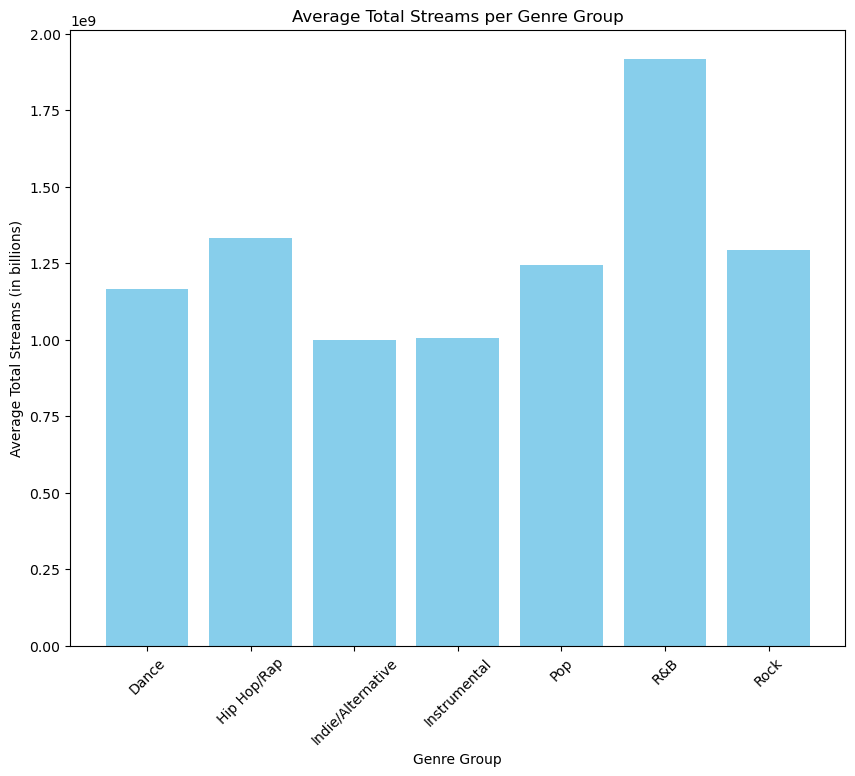

In [42]:
# Using top_track_genres dataframe
plt.figure(figsize=(10,8))
plt.bar(top_track_genres['genre_group'], top_track_genres['total_streams_avg'], color='skyblue')
plt.title('Average Total Streams per Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Average Total Streams (in billions)')
plt.xticks(rotation=45)
plt.show()

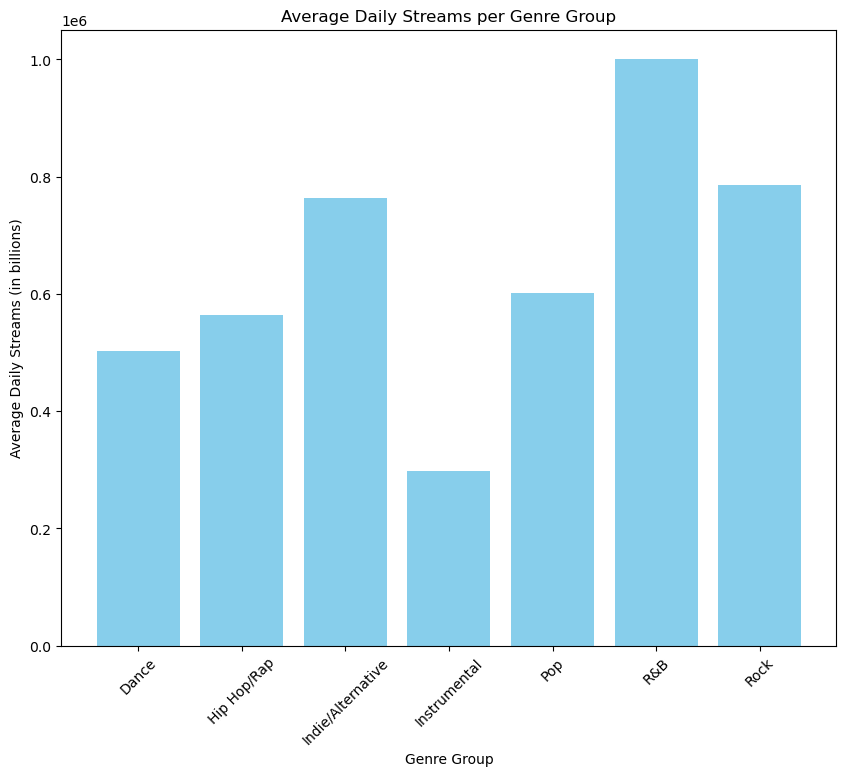

In [43]:
# Using top_track_genres dataframe
plt.figure(figsize=(10,8))
plt.bar(top_track_genres['genre_group'], top_track_genres['daily_streams_avg'], color='skyblue')
plt.title('Average Daily Streams per Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Average Daily Streams (in billions)')
plt.xticks(rotation=45)
plt.show()

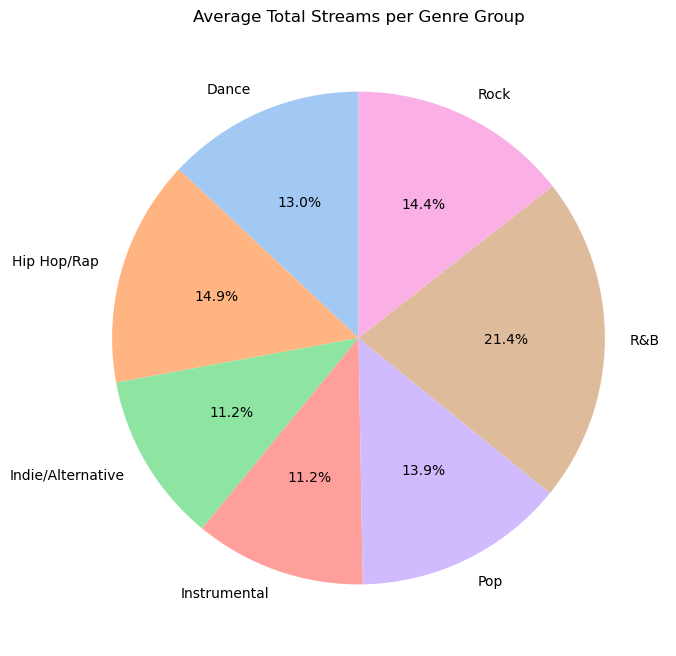

In [44]:
# Create a pie chart showing average total streams for each genre group in a pct point
plt.figure(figsize=(10,8))
plt.pie(top_track_genres['total_streams_avg'], 
        labels=top_track_genres['genre_group'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(top_track_genres)),
        startangle=90)

# Title and show
plt.title('Average Total Streams per Genre Group')
plt.show()

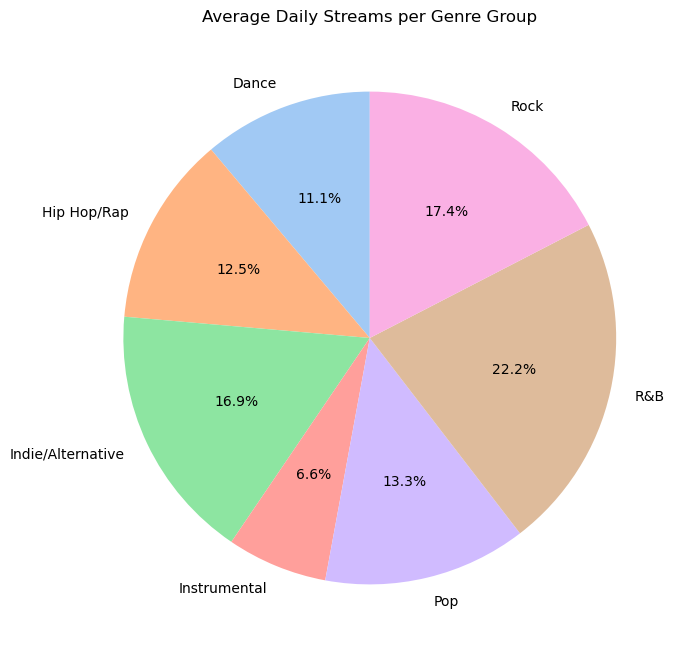

In [45]:
# Create a pie chart showing average daily streams for each genre group in a pct point
plt.figure(figsize=(10,8))
plt.pie(top_track_genres['daily_streams_avg'], 
        labels=top_track_genres['genre_group'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(top_track_genres)), 
        startangle=90) 

# Title and show
plt.title('Average Daily Streams per Genre Group')
plt.show()


In [46]:
total_streams_per_genre = streaming_df.groupby('genre_group').agg(
        total_streams_sum = ('total_streams', 'sum')
).reset_index()

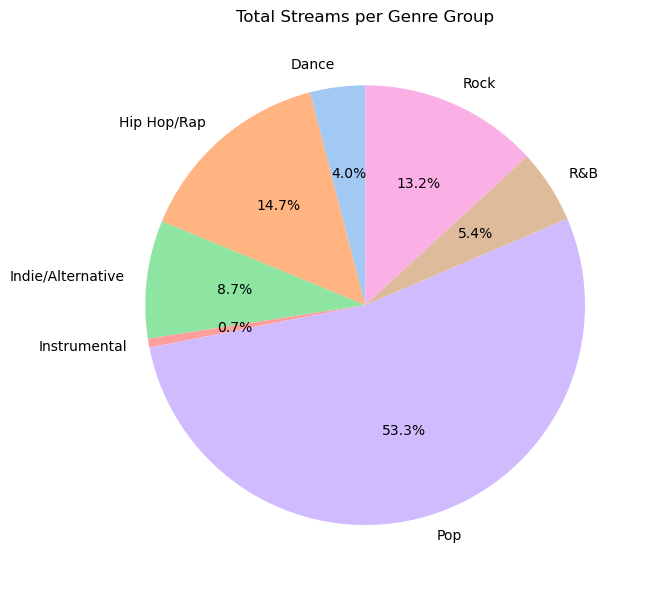

In [47]:
# Create a pie chart showing total streams for each genre group in a pct point
plt.figure(figsize=(10,6))
plt.pie(total_streams_per_genre['total_streams_sum'], 
        labels=total_streams_per_genre['genre_group'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(total_streams_per_genre)),
        startangle=90)

# Add title
plt.title('Total Streams per Genre Group')

# Show the pie chart
plt.tight_layout()
plt.show()


In [48]:
# Take a look at most used key and time signature as well as average tempo and duration for songs on a per genre basis
top_track_genres = streaming_df.groupby('genre_group').agg(
    mode_avg=('mode', 'mean'),
    tempo_avg=('tempo', 'mean'),
    duration_ms_avg=('duration_ms', 'mean'),
    key_mode=('key', pd.Series.mode),
    time_signature_mode=('time_signature', pd.Series.mode),
).reset_index()


In [49]:
# Round the numerical columns
top_track_genres[['mode_avg', 'tempo_avg', 'duration_ms_avg']] = top_track_genres[['mode_avg', 'tempo_avg', 'duration_ms_avg']].round(2)

# Format the 'duration_ms_avg' column with commas for readability
top_track_genres['duration_ms_avg'] = top_track_genres['duration_ms_avg'].apply(lambda x: "{:,}".format(int(x)))

# Sort the dataframe by tempo_avg in descending order
top_track_genres_sorted = top_track_genres.sort_values(by='tempo_avg', ascending=False)

# Display the cleaned-up results
print(top_track_genres_sorted)


         genre_group  mode_avg  tempo_avg duration_ms_avg  \
5                R&B      0.46     125.57         241,371   
2  Indie/Alternative      0.70     124.49         208,286   
0              Dance      0.38     121.64         191,349   
3       Instrumental      0.67     121.33         183,065   
4                Pop      0.60     119.27         204,945   
1        Hip Hop/Rap      0.59     118.03         218,058   
6               Rock      0.66     116.47         237,982   

                     key_mode         time_signature_mode  
5                         1.0                         1.0  
2  [1.0, 7.0, 8.0, 9.0, 10.0]  [1.0, 7.0, 8.0, 9.0, 10.0]  
0                         1.0                         1.0  
3                         4.0                         4.0  
4                         1.0                         1.0  
1                         5.0                         5.0  
6                         9.0                         9.0  
